In [36]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [51]:
# Для Графиков
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [37]:
from sklearn.datasets import load_iris

In [38]:
data = load_iris()

In [39]:
X, y = data['data'], data['target']

In [40]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [41]:
def create_model(hidden_units):
    # create model
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
list(range(1, 21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [49]:
scores_mean, scores_std = [], []
n_range = list(range(1, 21)) + [50, 100, 1000]

In [48]:
for hidden_units in n_range:
    estimator = KerasClassifier(
        build_fn=lambda : create_model(hidden_units), epochs=200, 
        batch_size=5, verbose=0)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(estimator, X, dummy_y, cv=kfold)
    scores_mean.append(results.mean() * 100)
    scores_std.append(results.std() * 100)
    print(f"(mean, std) = ({scores_mean[-1]}, {scores_std[-1]})")

(mean, std) = (97.33333349227905, 2.494438109169188)
(mean, std) = (95.33333361148834, 1.632993064521475)
(mean, std) = (95.33333361148834, 3.3993461397783586)


In [63]:
scores_mean = numpy.array(scores_mean)
scores_std = numpy.array(scores_std)

In [70]:
scores_down = scores_mean - scores_std
scores_down = [x if x >= 0 else 0 for x in scores_down]
scores_up = scores_mean + scores_std
scores_up = [x if x <= 100 else 100 for x in scores_up]

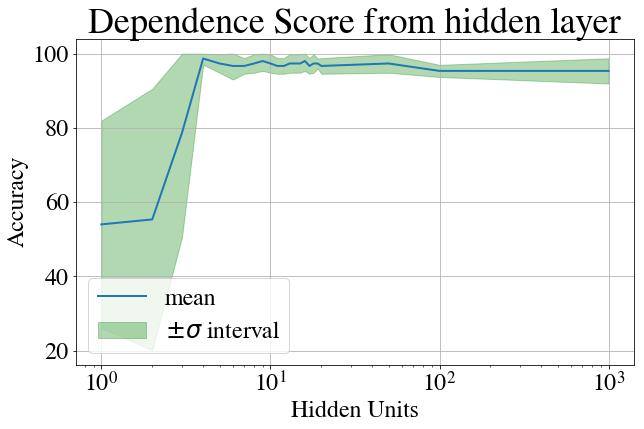

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(n_range, scores_mean, label='mean')
plt.fill_between(n_range, scores_down, scores_up, 
                 alpha=0.3, color='green', 
                label=r'$\pm\sigma$ interval')
plt.xscale('log')
plt.title('Dependence Score from hidden layer')
plt.xlabel('Hidden Units')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig('results.png')
plt.show()